<a href="https://colab.research.google.com/github/safa2hanoon/WebsiteTask/blob/master/DCT_On_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import functions and libraries**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_

from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab
import imageio
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

## **Display Image**

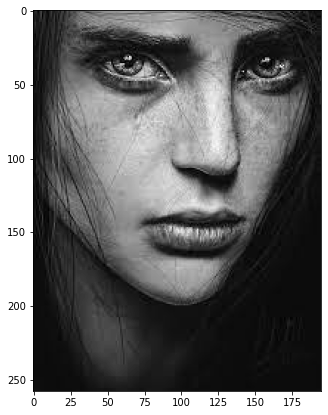

In [25]:
import imageio
im = imageio.imread('my-image.jpg')
im.shape  # im is a numpy array
(512, 512, 3)
f = plt.figure()
plt.imshow(im,cmap='gray')

## **Define 2D DCT and IDCT**

In [26]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

## **Perform a blockwise DCT**

In [27]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

# **Extract 8x8 block and look at its DCT coefficients**

Text(0.5, 1.0, 'An 8x8 DCT block')

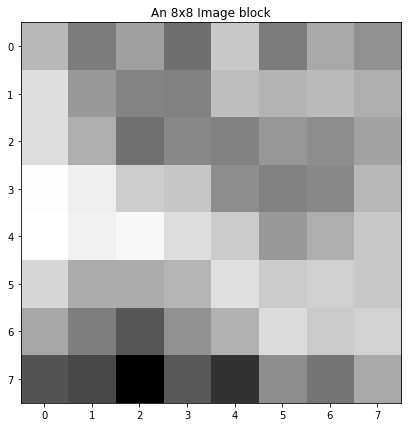

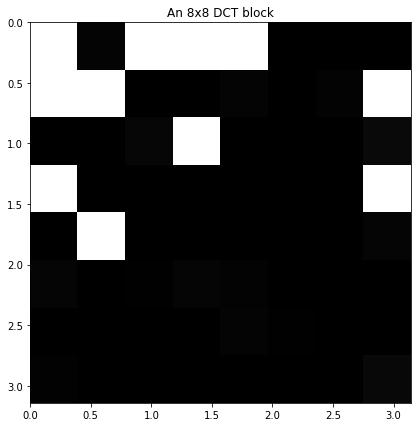

In [28]:
pos = 128
# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

## **Display all DCT blocks¶**


Text(0.5, 1.0, '8x8 DCTs of the image')

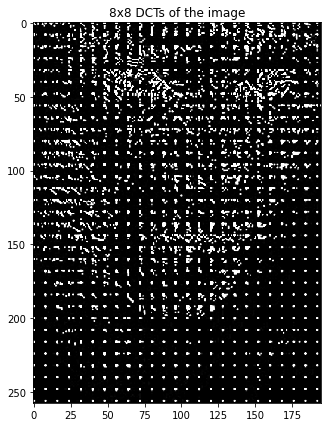

In [29]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

# **Threshold DCT coefficients**

Keeping only 12.639634% of the DCT coefficients


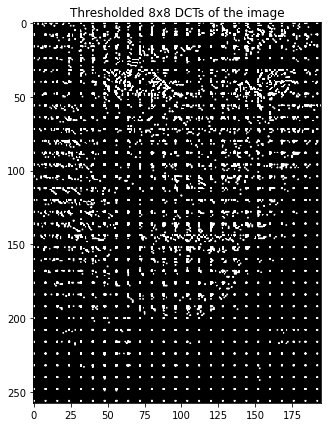

In [30]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

## **Compare DCT compressed image with original¶**


Text(0.5, 1.0, 'The Recosntracted Image')

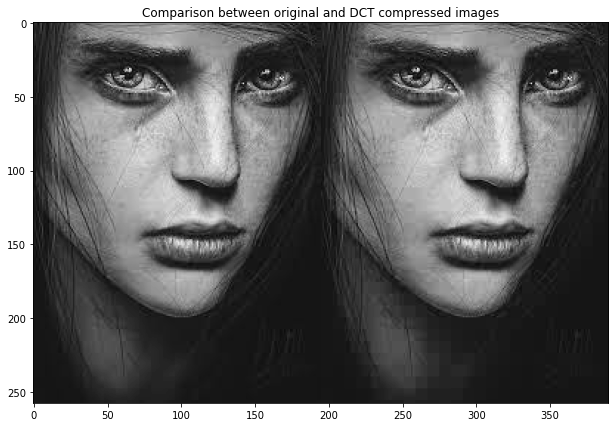

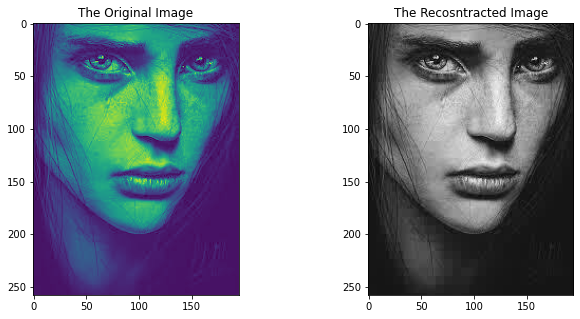

In [31]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
            
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

fig, ax = plt.subplots(1,2,figsize=(11,5))
ax[0].imshow(im);
ax[1].imshow(im_dct,cmap='gray');

ax[0].set_title('The Original Image')
ax[1].set_title('The Recosntracted Image')